<a href="https://colab.research.google.com/github/Ajakdeng/Ajaksolution/blob/main/Retail_predictive_analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
data = pd.read_excel(url)

In [ ]:
# Display the first few rows of the dataset
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
# Data Exploration
print(f"Number of missing values per column:\n{data.isnull().sum()}")


Number of missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Drop rows with missing values
data = data.dropna(subset=['CustomerID'])

In [ ]:
# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
# Feature Engineering - Recency, Frequency, Monetary (RFM) Model
# Recency: How recently a customer made a purchase
latest_date = data['InvoiceDate'].max()
data['Recency'] = (latest_date - data['InvoiceDate']).dt.days

In [ ]:
# Frequency: How many times a customer made a purchase
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

In [ ]:
# Monetary: Total spending per customer
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']
monetary = data.groupby('CustomerID')['TotalAmount'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

In [ ]:
# Merge the RFM data
rfm_data = pd.merge(frequency, monetary, on='CustomerID')
rfm_data['Recency'] = data.groupby('CustomerID')['Recency'].min().values

In [ ]:
# Create a target variable: Is the customer likely to make another purchase?
# Here we assume that customers with a frequency higher than a threshold are likely to make another purchase
rfm_data['RepeatPurchase'] = (rfm_data['Frequency'] > 1).astype(int)

In [ ]:
# Display the first few rows of the RFM dataset
print(rfm_data.head())

   CustomerID  Frequency  Monetary  Recency  RepeatPurchase
0     12346.0          2      0.00      325               1
1     12347.0          7   4310.00        1               1
2     12348.0          4   1797.24       74               1
3     12349.0          1   1757.55       18               0
4     12350.0          1    334.40      309               0


In [ ]:
# Split the data into features (X) and target (y)
X = rfm_data[['Recency', 'Frequency', 'Monetary']]
y = rfm_data['RepeatPurchase']

In [ ]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


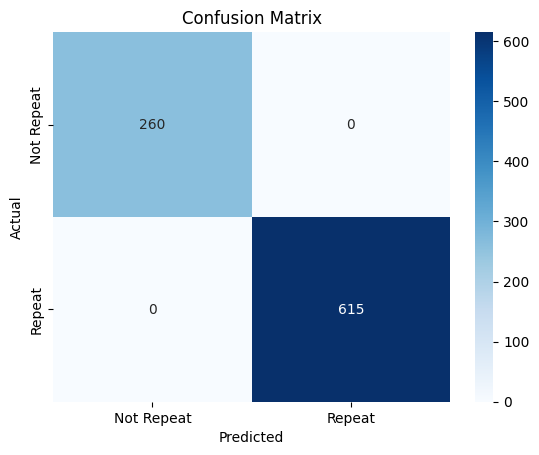

In [ ]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Repeat', 'Repeat'], yticklabels=['Not Repeat', 'Repeat'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00       615

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



In [ ]:
#  Make predictions on a new customer
new_customer = [[10, 3, 500]]  # Example customer: 10 days since last purchase, 3 purchases, spent 500
new_customer_scaled = scaler.transform(new_customer)
new_pred = model.predict(new_customer_scaled)
print(f"Prediction for the new customer (0 = Not Repeat, 1 = Repeat): {new_pred[0]}")

Prediction for the new customer (0 = Not Repeat, 1 = Repeat): 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
